In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
import re
import string
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import mean_squared_error


In [2]:

from afinn import Afinn
afinn = Afinn()


In [3]:
df = pd.read_csv('/Users/varsha/.spyder-py3/Rosen.csv')

df.head(3)

,tweet,Created-At,From-User,Retweet-Count,Account,Id
0,Heidi ?? ??️‍?? ✊???????? on Twitter: &quot;Mo...,2018-10-23 15:49:07,Heidi ?? ??️‍?? ✊????????,0.0,Scott,1.054822e+18
1,VoteVets on Twitter: &quot;Another verdict on ...,2018-10-23 14:33:31,VoteVets,311.0,Scott,1.054803e+18
2,"#ThePersistence on Twitter: &quot;FL, vote for...",2018-10-22 00:27:03,#ThePersistence,650.0,Scott,1.054228e+18


In [4]:
# Sentiment analysis with AFINN
afinn = Afinn(emoticons=True)
afinn_scores = [afinn.score(text) for text in df.tweet]
df['afinn'] = afinn_scores


In [5]:

#compute sentiment scores (polarity) and labels
sentiment_scores = [afinn.score(text) for text in df.tweet]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]


In [6]:
df1 = pd.DataFrame([list(df['tweet']), sentiment_scores, sentiment_category]).T
df1.columns = ['tweet', 'sentiment_scores', 'sentiment_category']
df1['sentiment_scores'] = df1.sentiment_scores.astype('float')
df1.groupby(by=['tweet']).describe()


sentiment_scores        \
                                                              count  mean   
tweet                                                                       
#ThePersistence on Twitter: &quot;FL, vote for ...              1.0   0.0   
????????VB ????????Nationalist⭐️⭐️⭐️ on Twitter...              1.0   5.0   
??Blue House: 100+ Women &amp; POC! on Twitter:...              1.0  -4.0   
@AMErikaNGIRLBOT: Attention Florida ! #VoteHimO...              4.0  -3.0   
@AndrewGillum: .@NelsonForSenate has been a tir...              1.0   2.0   
@Anncostanza1: @1776HotLips @RonDeSantisFL If y...              2.0   6.0   
@AuntCinnamon: ???? ???? ???? VOTE ???? ???? ??...              1.0   3.0   
@Autism_Strong @ScottPresler @RonDeSantisFL @Sc...              1.0   5.0   
@BeachGatorFL: .@RNRFlorida @POTUS @realDonaldT...             13.0   0.0   
@BeachGatorFL: .@realDonaldTrump @POTUS \n?????...              2.0   0.0   
@CampagnaTerry: @ScottforFlorida @DanWantsFreed...              1.0   2.0   
@CatSocialist: @FLGovScott @ScottforFlorida @FL...              2.0   1.0   
@ConservativePTZ @RonDeSantisFL @ScottforFlorid...              1.0   0.0   
@ConservativePTZ: Sonny has an important messag...              2.0   2.0   
@DharmaMum: @ScottforFlorida Strange that #30A ...              2.0  -1.0   
@Eightofnine8: @ScottPresler @RonDeSantisFL @Sc...              2.0   1.0   
@Feisty_FL @RonDeSantisFL @ScottforFlorida Love...              1.0   9.0   
@Feisty_FL: I just early voted with my #MAGA ha...              4.0   0.0   
@FeralKarma @ScottforFlorida @RonDeSantisFL Orl...              1.0  -1.0   
@FloridaGOP: New polling shows @ScottforFlorida...              1.0   2.0   
@FloridaGOP: Spotted: Large chicken outside of ...              2.0   0.0   
@Gamers4Scott: Wow amazing! @RonDeSantisFL did ...              4.0  12.0   
@Germantownrunne: @ScottPresler @davhalter @Ron...              1.0   0.0   
@JOHN3_15: @ScottPresler @trumptrain1111 @Scott...              1.0   2.0   
@KyleKashuv: It’s time Florida relieves @SenBil...              4.0  -2.0   
@LWN_: @ScottforFlorida #RedTideRick ??\n"Durin...              1.0   2.0   
@LarrySchweikart: @mrmonks01 @TedCornwell @RonD...              1.0   0.0   
@LarrySchweikart: @mrmonks01 @TedCornwell @RonD...              1.0   0.0   
@NGivasDC: Florida Gov Rick Scott Calls Out Sen...              1.0  -1.0   
@NancyIncocoa: @Danager27 @alley167 @RonDeSanti...              1.0   0.0   
...                                                             ...   ...   
Kummsss on Twitter: &quot;You listed two that I...              1.0  -3.0   
Lori Brolin-Zizza on Twitter: &quot;Did you wat...              1.0   0.0   
Lori Brolin-Zizza on Twitter: &quot;I&#39;m Pre...              1.0  -2.0   
Nan50 on Twitter: &quot;I am brow beating every...              1.0   0.0   
Nat Atkins on Twitter: &quot;We&#39;re lucking ...              1.0  10.0   
Nationalist Kevin on Twitter: &quot;#Florida FL...              1.0   1.0   
Nationalist Matt⭐️⭐️⭐️ on Twitter: &quot;@Andre...              1.0   0.0   
Not My Cheato on Twitter: &quot;Oh look another...              1.0   6.0   
Paul Magdalin on Twitter: &quot;Is that what Mi...              1.0   0.0   
Public Nuisance on Twitter: &quot;Rick Scott ig...              1.0   1.0   
RY on Twitter: &quot;And @RonDeSantisFL will ma...              1.0  -4.0   
Rick Scott on Twitter: &quot;Good luck @RonDeSa...              1.0   9.0   
Robert McLaws on Twitter: &quot;Wow, ⁦@Scottfor...              1.0   4.0   
Rochelle Swanson on Twitter: &quot;Wow!&#10;&#1...              1.0   6.0   
Rocket44 ???? on Twitter: &quot;I&#39;m early v...              1.0   1.0   
SOUTHERN NATIONALIST TROLL on Twitter: &quot;Fl...              1.0  -2.0   
SStone on Twitter: &quot;He bombed. Florida alr...              1.0   2.0   
TOᑭ ᖇOᑭE TᖇAViS on Twitter: &quot;Rick Scott sa...              1.0   8.0   
TeHenderson on Twitter: &quot;Wait til the ille

In [7]:

#function for tokenizing summary
regEx = re.compile('[^a-z]+')
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = regEx.sub(' ', reviewText).strip()
    return reviewText

cluster = df1.groupby("sentiment_scores")["tweet"].apply(list)
cluster = pd.DataFrame(cluster)
cluster.to_csv("cluster.csv")
cluster1 = pd.read_csv("cluster.csv")
cluster1["TextClean"] = cluster1["tweet"].apply(cleanReviews)



In [8]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


In [9]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords = stopwords,
        max_words=500,
        max_font_size=30, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
        

In [10]:
df1["sentiment_category"].describe()

count          888
unique           3
top       positive
freq           485
Name: sentiment_category, dtype: object

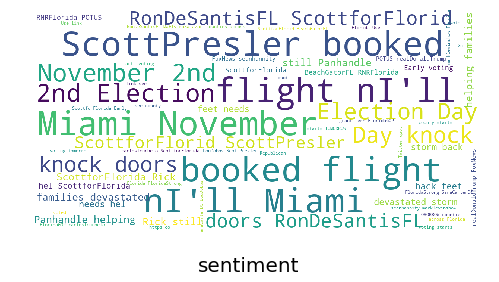

In [11]:
#Wordcloud on unclean data       
#category 0
show_wordcloud(cluster['tweet'][0], title ="sentiment")    
    

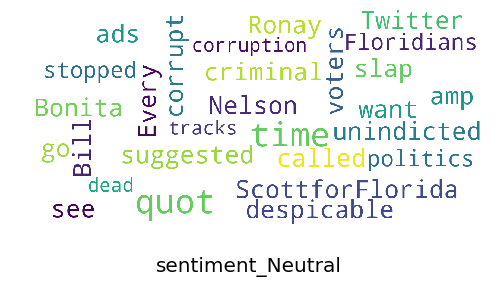

In [12]:
#Wordcloud on cleaned data      
#category 0
show_wordcloud(cluster1['tweet'][0], title ="sentiment_Neutral")    
    

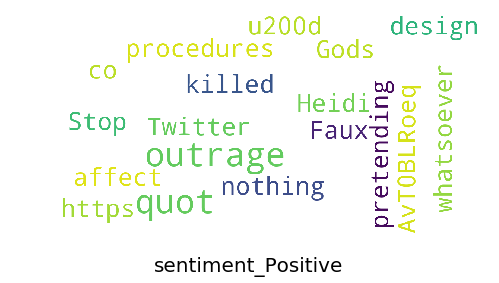

In [13]:
show_wordcloud(cluster1['tweet'][1], title ="sentiment_Positive")    
    

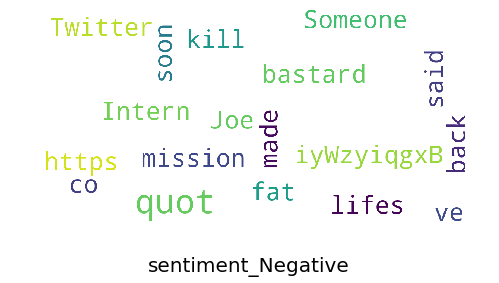

In [14]:
show_wordcloud(cluster1['tweet'][2], title ="sentiment_Negative")    
    

In [15]:
df1["sentiment_category"].unique()

array(['negative', 'neutral', 'positive'], dtype=object)